In [237]:
from binarytree import tree
from binarytree import build
from binarytree import Node
from binarytree import bst
from collections import deque
import numpy as np
import sys

In [240]:
node_values = [10, 5, 20, 4, 7, 13, 25, 3, None, 6, 8, 11, 14, 23, 27]
bst_root = build(node_values)
print(bst_root)


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27



https://www.geeksforgeeks.org/tree-traversals-inorder-preorder-and-postorder/

### Preorder
1. Preorder traversal is used to create a copy of the tree. 
2. Preorder traversal is also used to get prefix expression on of an expression tree. 
3. Please see http://en.wikipedia.org/wiki/Polish_notation to know why prefix expressions are useful.

In [241]:
def preorder(node, level):
    
    if node is None:
        return
    
    print(('\t' * (level)) + str(node.value))
    preorder(node.left, level+1)    
    preorder(node.right, level+1)
    
preorder(bst_root, 0)

10
	5
		4
			3
		7
			6
			8
	20
		13
			11
			14
		25
			23
			27


In [246]:
def preorderreverse(node, level):
    
    if node is None:
        return
    
    print(('\t' * (level)) + str(node.value))
    preorderreverse(node.right, level+1)    
    preorderreverse(node.left, level+1)
print(bst_root) 
preorderreverse(bst_root, 0)


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

10
	20
		25
			27
			23
		13
			14
			11
	5
		7
			8
			6
		4
			3


### Inorder
1. Inorder traversal gives nodes in non-decreasing order. 
2. To get nodes of BST in asceding order
3. A variation of Inorder traversal where Inorder traversal s reversed can be used.

In [92]:
def inorder(node, level):
    
    if node is None:
        return
    
    inorder(node.left, level+1)    
    print(('\t' * (level)) + str(node.value))
    inorder(node.right, level+1)
    
print(bst_root)
inorder(bst_root, 0)


      ____10_________
     /               \
    5             ____20___
   / \           /         \
  4   6        _15         _26
 /     \      /   \       /   \
3       7    11    14    23    27

			3
		4
	5
		6
			7
10
			11
		15
			14
	20
			23
		26
			27


In [243]:
def inorderreverse(node, level):
    
    if node is None:
        return
    
    inorderreverse(node.right, level+1)    
    print(('\t' * (level)) + str(node.value))
    inorderreverse(node.left, level+1)
    
print(bst_root)
inorderreverse(bst_root, 0)


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

			27
		25
			23
	20
			14
		13
			11
10
			8
		7
			6
	5
		4
			3


### Postorder
1. Postorder traversal is used to delete the tree. 
2. Please see the question for deletion of tree for details. 
3. Postorder traversal is also useful to get the postfix expression of an expression tree. Please see http://en.wikipedia.org/wiki/Reverse_Polish_notation to for the usage of postfix expression.

In [93]:
def postorder(node, level):
    
    if node is None:
        return
    
    postorder(node.left, level+1)    
    postorder(node.right, level+1)
    print(('\t' * (level)) + str(node.value))

print(bst_root)
postorder(bst_root, 0)


      ____10_________
     /               \
    5             ____20___
   / \           /         \
  4   6        _15         _26
 /     \      /   \       /   \
3       7    11    14    23    27

			3
		4
			7
		6
	5
			11
			14
		15
			23
			27
		26
	20
10


In [126]:
def inorderiterative(root):
    
    stack = deque()
    node = root
    
    while True:
        
        # inorder(node.left)
        while node != None:
            stack.append(node)
            node = node.left
                    
        if len(stack) == 0:
            break
        
        # Visit
        node = stack.pop()
        print(node.value)
        
        # inorder(node.right)
        node = node.right
        
print(bst_root)
inorderiterative(bst_root)    


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

3
4
5
6
7
8
10
11
13
14
20
23
25
27


### Inorder Successor

1. Find the node in BST.

2. If node has a right child then the left most child in right child’s subtree will be the in-order successor of node. This would also be the child with the minimum value in that subtree.

3. If node has no right child then:

    * in-order successor is NULL if node is right most node in the BST i.e. last node in the in-order traversal.
    * in-order successor is the node with minimum value higher than node in the parent chain of the node.
    
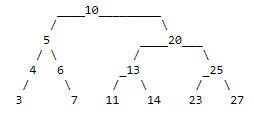

* **As we move left from a node. The node is the successor of node.left - So update successor**
* **If the node has right child then go right and keep going left most node to get the successor**

* Say we are deleting 3
    * 3 < 10. Move left to 5 and update the successor to 10    
    * 3 < 5.  Move left to 4 and update the successor to 5
    * 3 < 4.  Move left to 3 and update the successor to 4
    * 3 does not have right child. So successor is 4
    
* Say we are deleting 6
    * 6 < 10. Move left to 5 and update the successor to 10    
    * 6 > 5.  Move right to 7
    * 6 < 7.  Move left to 6 and update the successor to 7
    * 3 does not have right child. So successor is 4
    
* Say we are deleting 8
    * 8 < 10. Move left to 5 and update the successor to 10    
    * 8 > 5.  Move right to 7 
    * 8 < 7.  Move right to 8. 
    * 8 does not have right child. So successor is 10
    
* Say we are deleting 23
    * 23 > 10. Move right to 20
    * 23 > 20. Move right to 25
    * 23 < 25. Move to left and update successor to 25
    * 23 does not have right child. So successor is 25

* Say we are deleting 20
    * 20 > 10. Move right to 20
    * 20 == 20 20 has right child. Go to right child and go to left most to get the successor

* Say we are deleting 7
    * 7 < 10. Move left to 5 and update the successor to 10    
    * 7 > 5.  Move right to 7 
    * 7 == 7. 7 has right child. Go to right child and go to left most to get the successor
    

In [124]:
def inordersuccessor(root, val):
    
    if root == None:
        return None

    successor = None    
    node = root    
    
    # find the node and keep track of successor
    while node != None:
              
        if val > node.value:
            node = node.right        
        elif val < node.value:
            successor = node.value
            node = node.left
        else:
            # found the node. if node has right child then move right child and go toward left to get the lowest value node
            # which is the successor
            if node.right != None:
                node = node.right
                successor = node.value

                while node != None:
                    node = node.left
                    if node != None:
                        successor = node.value
            break;            
    
    return successor
            
print(bst_root)

r = inordersuccessor(bst_root, 5)
assert (r == 6)

r = inordersuccessor(bst_root, 20)
assert (r == 23)
r = inordersuccessor(bst_root, 14)
assert (r == 20)

r = inordersuccessor(bst_root, 27)
assert (r == None)
    


      ____10_________
     /               \
    5             ____20___
   / \           /         \
  4   6        _13         _25
 /     \      /   \       /   \
3       7    11    14    23    27



### Level Order

1. Dequeue nodes until we see None marker and enqueue its children
2. Add None element as a marker for the level. Add the marker only if queue has elements. At the leaf level, there won't be any elements in the queue
3. 

In [131]:
def levelorderwithlevels(root):
    
    queue = deque()
    
    queue.append(root)
    # level end marker
    queue.append(None)
    
    level = 0
    while len(queue) != 0:        
               
        level += 1
        while len(queue) != 0:
            
            node = queue.popleft()
            
            # Popped all nodes at a level
            if node is None:
                break
                
            print(node.value, level)
            if node.left != None:
                queue.append(node.left)
                
            if node.right != None:
                queue.append(node.right)            
        
        # level end marker
        if len(queue) != 0:
            queue.append(None)

print(bst_root)           
levelorderwithlevels(bst_root)


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

10 1
5 2
20 2
4 3
7 3
13 3
25 3
3 4
6 4
8 4
11 4
14 4
23 4
27 4


In [132]:
def levelorder(root):
    
    queue = deque()
    
    queue.append(root)
    while len(queue) != 0:
        node = queue.popleft()
        print(node.value)
        if node.left != None:
            queue.append(node.left)
                
        if node.right != None:
            queue.append(node.right)                
        

print(bst_root)           
levelorder(bst_root)


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

10
5
20
4
7
13
25
3
6
8
11
14
23
27


In [162]:
def zigzag(root):
    stack1 = deque()
    stack2 = deque()
    
    stack1.append(root)    
        
    level = 0
    while len(stack1) != 0:        
        
        # pop one node at a time from stack1, add its children to another stack (stack2).
        # depending on the level add left or right first and then right or left
        # swap the stack for the next level
        while len(stack1) > 0:
            
            node = stack1.pop()
                            
            print(node.value, level)
            
            if level % 2 == 1:
                if node.right != None:
                    stack2.append(node.right)
                    
                if node.left != None:
                    stack2.append(node.left)                   
                
            else:
                if node.left != None:
                    stack2.append(node.left)
                    
                if node.right != None:
                    stack2.append(node.right)
                    
        level += 1
        stack1, stack2 = stack2, stack1
         
        
print(bst_root)           
zigzag(bst_root)         


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

10 0
20 1
5 1
4 2
7 2
13 2
25 2
27 3
23 3
14 3
11 3
8 3
6 3
3 3


In [217]:
class LevelNode(Node):    
    def __init__(self, value):
        self.next = None        
        super().__init__(value)
        
    def printLevelOrder(self):
        nextLevelRoot = self
        while nextLevelRoot:
            current = nextLevelRoot       
            nextLevelRoot = None
            while current:
                print(str(current.value) + " ", end='')
                # Set the next level first node for next iteration
                if nextLevelRoot is None:
                    if current.left:
                        nextLevelRoot = current.left
                    elif current.right:
                        nextLevelRoot = current.right

                # go to next sibling
                current = current.next

            print()

def connectSiblings(root):
    stack1 = deque()
    stack2 = deque()
    
    stack1.append(root)    
        
    level = 0
    while len(stack1) != 0:        
        
        # pop one node at a time from stack1, add its children to another stack (stack2).
        # depending on the level add left or right first and then right or left
        # swap the stack for the next level
                
        lastNode = None
        while len(stack1) > 0:
            
            node = stack1.popleft()
            
            print("Working on:", node.value)
            
            leftNode = node.left
            rightNode = node.right
            
            if leftNode == None and rightNode == None:
                continue
           
            if leftNode != None:
                
                if lastNode == None:
                    lastNode = leftNode                    
                else:
                    lastNode.next = leftNode
                    lastNode = leftNode
                
                stack2.append(leftNode)
                    
            if rightNode != None:
                
                if lastNode == None:
                    lastNode = rightNode                    
                else:
                    lastNode.next = rightNode
                    lastNode = rightNode
                    
                stack2.append(rightNode)
                            
            print(node.value, level)
        
        '''
        print("printing levels")
        if len(stack2) > 0:
            temp = stack2[0]
            iterator = temp
            while iterator:
                print(iterator.value)
                iterator = iterator.next
        '''
        
        level += 1
        stack1, stack2 = stack2, stack1         

# Build tree
level_bst_root = LevelNode(10)
level_bst_root.left = LevelNode(5)
level_bst_root.right = LevelNode(20)
level_bst_root.left.left = LevelNode(4)
level_bst_root.right.left = LevelNode(7)
level_bst_root.right.left = LevelNode(13)
level_bst_root.right.right = LevelNode(25)


print(level_bst_root)           
connectSiblings(level_bst_root)
level_bst_root.printLevelOrder()



    10___
   /     \
  5      _20
 /      /   \
4      13    25

Working on: 10
10 0
Working on: 5
5 1
Working on: 20
20 1
Working on: 4
Working on: 13
Working on: 25
10 
5 20 
4 13 25 


### Print boundary of a tree

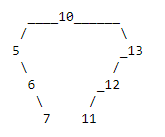



1. Print left boundary. We use pre order - print as we visit. Go left and if node not found, go right until we hit a leaf
2. Print the leaves from left to right - we can use on traversal. we are using pre-order
3. Pring right boundary. We use post order. We move right and left only if right is not found until we hit a leaf.
    * We return while printing

In [234]:
def printLeftBoundary(node):
    """
    print nodes that are on the left hand side
    don't print leaf
    using pre-order because we visit as we advance
    """
    if node is None:
        return None
    if node.left is None and node.right is None:
        return None
    
    print(node.value)
    
    # Go left as long as we can. Only go right if left is not found
    if node.left != None:
        printLeftBoundary(node.left)        
    elif node.right != None:
        printLeftBoundary(node.right)

def printLeaves(node):
    """
    print nodes that has no left and right nodes
    using preorder as we can print from left to right as we visit
    """
    if node is None:
        return
    
    if node.left is None and node.right is None:
        print(node.value)
        return
           
    printLeaves(node.left)
    printLeaves(node.right)
    
def printRightBoundary(node):
    """
    print nodes that are on the left hand side
    don't print leaf
    using post-order because we need to print in reverse order of our visits
    """
    if node is None:
        return None
    
    if node.left is None and node.right is None:
        return None
   
    # Go right as long as we can. Only go left if right is not found
    if node.right != None:
        printLeftBoundary(node.right)        
    elif node.left != None:
        printLeftBoundary(node.left)
        
    print(node.value)

boundary_node_values = [10, 5, 13, None, 6, 12, None, None, None, None, 7, 11]
boundary_root = build(boundary_node_values)
print(boundary_root)  

print("Left Boundary")
printLeftBoundary(boundary_root)
print("Print Leaves")
printLeaves(boundary_root)
print("Right Leaves")
printRightBoundary(boundary_root)


tree

  ____10______
 /            \
5             _13
 \           /
  6        _12
   \      /
    7    11

Left Boundary
10
5
6
Print Leaves
7
11
Right Leaves
13
12
10


### Serialize and Deserialize Tree

In [239]:
def serialize(arr, node):
    
    if node is None:
        arr.append(sys.maxsize)
        return None    
    # visit
    arr.append(node.value)    
    serialize(arr, node.left)
    serialize(arr, node.right)

def deserialize(arr):    
    val = arr.popleft()
    if val == sys.maxsize:
        return    
    node = Node(val)
    node.left = deserialize(arr)
    node.right = deserialize(arr)
    
    # when the stack unwinds, we end up at the root
    return node
        
serialize_node_values = [10, 5, 13, None, 6, 12, None, None, None, None, 7, 11]
serialize_root = build(serialize_node_values)
print(serialize_root)

arr = deque()
serialize(arr, serialize_root)
print(arr)

deserialize_root = deserialize(arr)
print(deserialize_root)
    


  ____10______
 /            \
5             _13
 \           /
  6        _12
   \      /
    7    11

deque([10, 5, 9223372036854775807, 6, 9223372036854775807, 7, 9223372036854775807, 9223372036854775807, 13, 12, 11, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807])

  ____10______
 /            \
5             _13
 \           /
  6        _12
   \      /
    7    11



In [242]:
node_values = [10, 5, 20, 4, 7, 13, 25, 3, None, 6, 8, 11, 14, 23, 27]
bst_root = build(node_values)
print(bst_root)

arr = deque()
serialize(arr, bst_root)
print(arr)

deserialize_root = deserialize(arr)
print(deserialize_root)
    


      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

deque([10, 5, 4, 3, 9223372036854775807, 9223372036854775807, 9223372036854775807, 7, 6, 9223372036854775807, 9223372036854775807, 8, 9223372036854775807, 9223372036854775807, 20, 13, 11, 9223372036854775807, 9223372036854775807, 14, 9223372036854775807, 9223372036854775807, 25, 23, 9223372036854775807, 9223372036854775807, 27, 9223372036854775807, 9223372036854775807])

      ______10_________
     /                 \
    5__             ____20___
   /   \           /         \
  4     7        _13         _25
 /     / \      /   \       /   \
3     6   8    11    14    23    27

